# Смирнов Д.И., РК№1, ИУ5Ц-81Б, вариант №28

Задача №4.
Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков?


Датасет №4
Heart Disease Dataset (kaggle.com)
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### Импорт библиотек и открытие датасета

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path
%matplotlib inline  

In [2]:
data =pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Приступим к разведочному анализу. Для начала проверим датасет на корректность данных.

In [6]:
# первые пять строк датасета
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
#информация о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
#проверим на пропуски еще раз
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Описание датасета показало отсутствие пропусков а также тип данных 14 столбцов. Общее количество записей 1024. <br>Описание столбцов


<br>1.age - возраст
<br>2.sex - пол
<br>3.chest pain type (4 values) - тип боли в груди
<br>4.resting blood pressure - артериальное давление в состоянии покоя
<br>5.serum cholestoral in mg/dl -  уровень холестерина в сыворотке крови натощак, мг/дл
<br>6.fasting blood sugar > 120 mg/dl - уровень сахара в крови натощак > 120 мг/дл
<br>7.resting electrocardiographic results (values 0,1,2) - результаты электрокардиографии в состоянии покоя (значения 0,1,2)
<br>8.maximum heart rate achieved - достигнута максимальная частота сердечных сокращений
<br>9.exercise induced angina -стенокардия, вызванная физической нагрузкой
<br>10.oldpeak = ST depression induced by exercise relative to rest - олдпик = депрессия ST, вызванная физической нагрузкой по сравнению с отдыхом.
<br>11.the slope of the peak exercise ST segment - наклон сегмента ST пикового упражнения
<br>12.number of major vessels (0-3) colored by flourosopy - количество крупных сосудов (0-3), окрашенных методом флуороскопии
<br>13.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect -флуороскопии: 0 = нормальный; 1 = фиксированный дефект; 2 = обратимый дефект
<br>14. target - цель(0-1), целевая переменная, на наличие или отсутствие сердечный заболеваний

In [11]:
data.describe()
#Статистические данные 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Разведочный анализ

Проанализируем целевую переменную

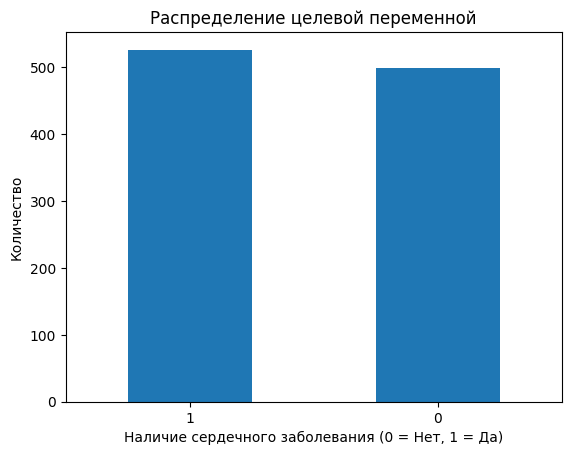

In [23]:

target_count = data['target'].value_counts()
plt.figure()
target_counts.plot(kind='bar')
plt.title('Распределение целевой переменной')
plt.xlabel('Наличие сердечного заболевания (0 = Нет, 1 = Да)')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

*Отсюда вывод что количество заболевших ненамного больше, чем здоровых.*

Создадим диаграмму распределения заболеваний по полу.

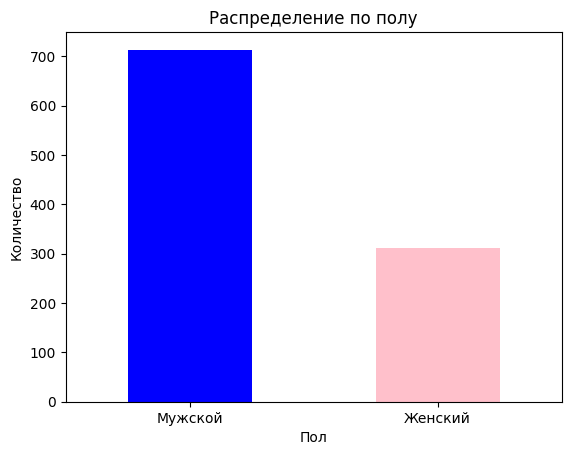

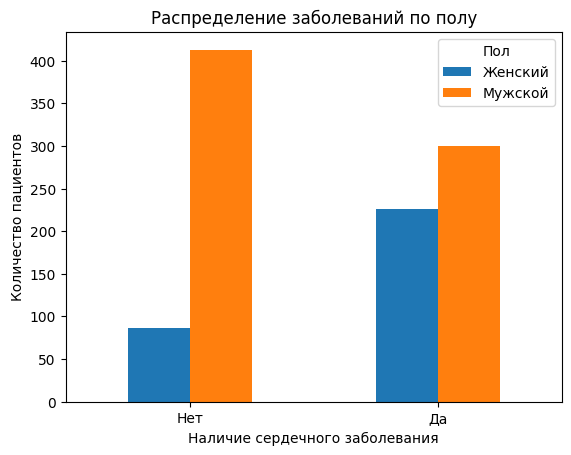

In [41]:
sex_counts = data['sex'].value_counts()


sex_counts.plot(kind='bar', color=['blue', 'pink'])

plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks(ticks=[0, 1], labels=['Мужской', 'Женский'], rotation=0)

plt.show()
pd.crosstab(data.target, data.sex).plot(kind ="bar")
plt.title('Распределение заболеваний по полу')
plt.xlabel('Наличие сердечного заболевания')
plt.ylabel('Количество пациентов')
plt.xticks(ticks=[0, 1], labels=['Нет', 'Да'], rotation=0)
plt.legend(title='Пол', labels=['Женский', 'Мужской'])
plt.show()

*Можно сделать вывод, что в исследовании мужчин принимает участие в более чем два раза больше чем женщин. Также больных женщин больше в 2.5 раза чем здоровых, а здоровых мужчин наоборот больше чем больных*

Создадим диаграмму распределения людей по возрасту

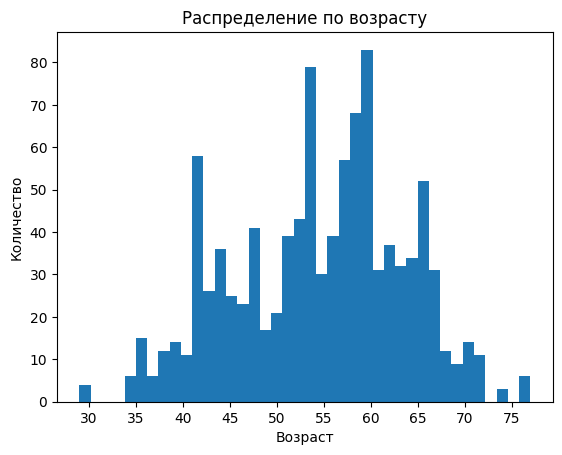

In [61]:

data['age'].plot(kind='hist', bins=40)

plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.xticks(range(30, 80, 5))
plt.show()


Создадим диаграмму зависимости заболеваний от возраста

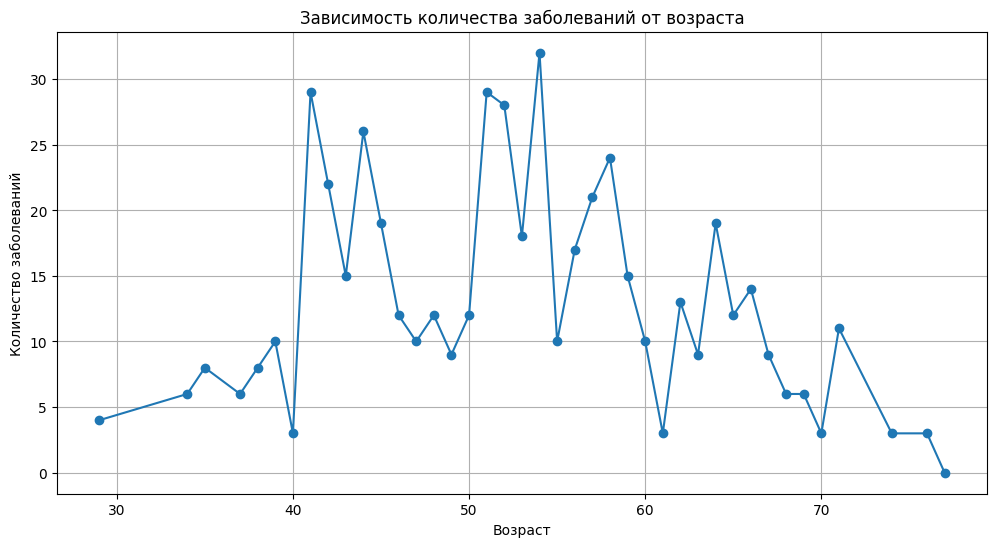

In [63]:
# Группировка данных по возрасту и подсчет количества заболеваний в каждой возрастной группе
age_target_counts = data.groupby('age')['target'].sum()

# Построение графика зависимости количества заболеваний от возраста
plt.figure(figsize=(12, 6))
plt.plot(age_target_counts.index, age_target_counts.values, marker='o', linestyle='-')
plt.title('Зависимость количества заболеваний от возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество заболеваний')
plt.xticks(rotation=0)
plt.grid(True)  # Включение сетки для лучшей визуализации
plt.show()

*По данной диаграмме зависимость не прослеживается, только то, что в диапазоне 50-60 лет больше всего заболеваний, но и количество людей, участвующих в исследовании в данном диапазоне, больше чем в других.*

Диаграмма зависимости уровня холестерина от возраста.

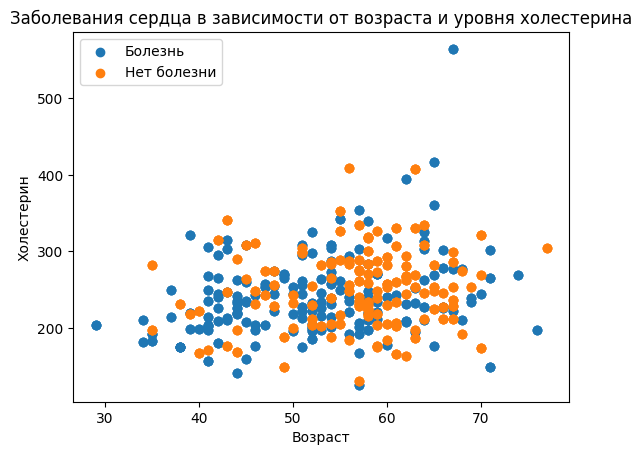

In [65]:
plt.scatter(data.age[data.target == 1],
           data.chol[data.target ==1])

plt.scatter(data.age[data.target==0],
           data.chol[data.target==0],)

plt.xlabel("Возраст")
plt.ylabel("Холестерин")
plt.legend(["Болезнь", "Нет болезни"])
plt.title("Заболевания сердца в зависимости от возраста и уровня холестерина")
plt.xticks(rotation = 0)
plt.show()

*По данной статистике можно отметить, что у больных людей уровень холестерина в среднем ниже чем у здоровых людей, а также есть аномальное значение с предельно высоким значением холестерина.*

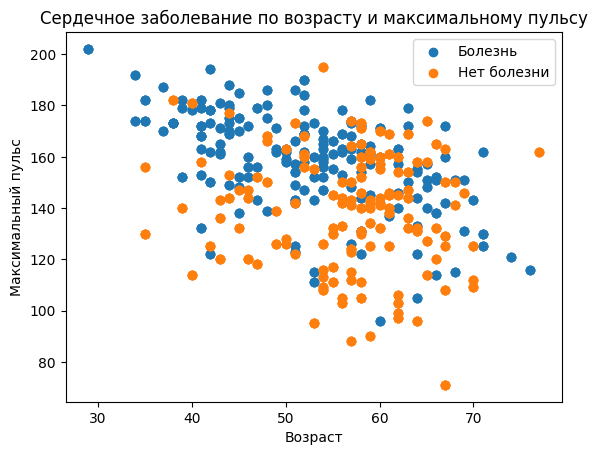

In [67]:

plt.scatter(data.age[data.target == 1], data.thalach[data.target == 1])
plt.scatter(data.age[data.target == 0], data.thalach[data.target == 0])
plt.xlabel("Возраст")
plt.ylabel("Максимальный пульс")
plt.legend(["Болезнь", "Нет болезни"])
plt.title("Сердечное заболевание по возрасту и максимальному пульсу")
plt.xticks(rotation=0)
plt.show()

*Отсюда можно сделать вывод, что у людей с сердечными болезнями средний пульс выше среднего пульса здоровых людей.*

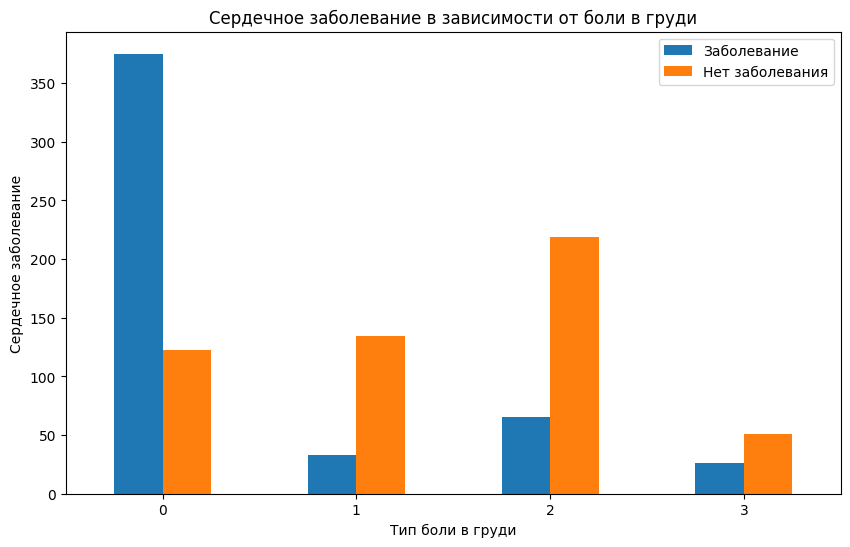

In [71]:
pd.crosstab(data.cp, data.target).plot(kind="bar", figsize=(10, 6))

plt.title("Сердечное заболевание в зависимости от боли в груди")
plt.xlabel("Тип боли в груди")
plt.ylabel("Сердечное заболевание")
plt.legend(["Заболевание", "Нет заболевания"])
plt.xticks(rotation=0)
plt.show()


*Можно наблюдать, что у больных людей в большинстве нулевой тип боли, а у здоровых людей преобладает второй тип боли.*

### Матрица корреляции

cor_matrix = data.corr()
cor_matrix

In [72]:
cor_matrix = data.corr()
cor_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

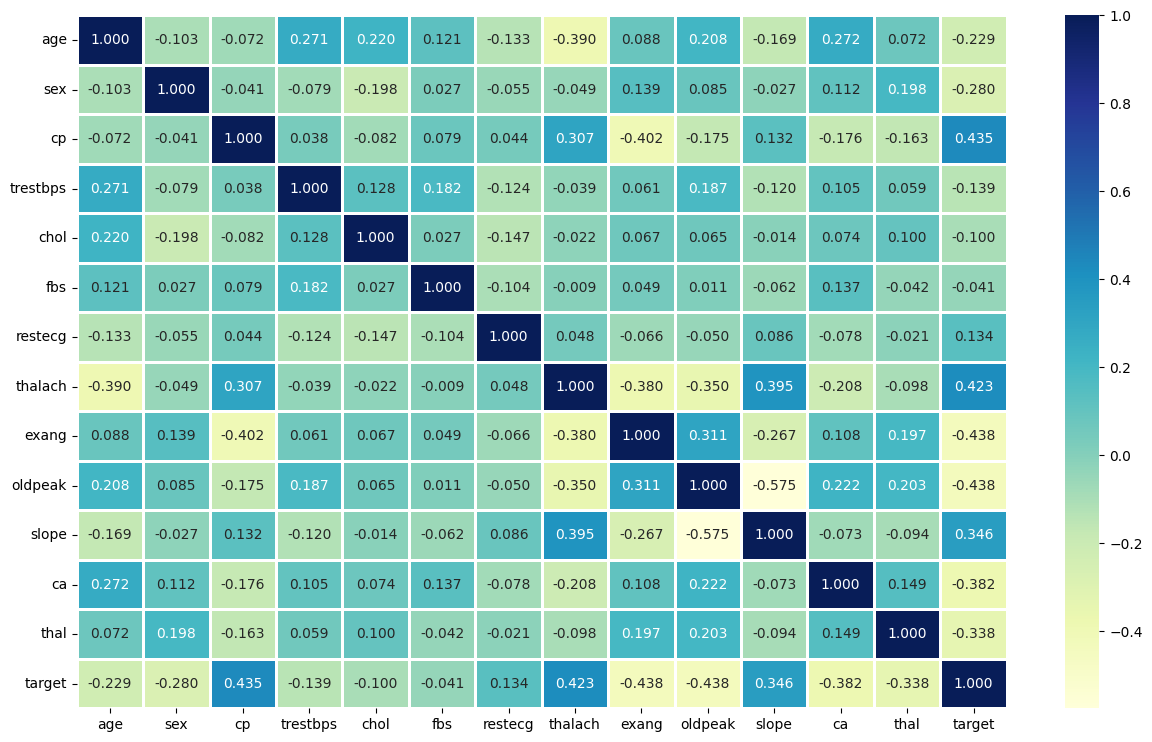

In [74]:
cor_matrix = data.corr()
plt.figure(figsize = (15,9))
sns.heatmap(cor_matrix, 
           annot = True,
           linewidth = 1,
            fmt= ".3f", 
            cmap="YlGnBu"
           )

С помощью матрицы корреляции можно выяснить исходя из значений зависимость переменных друг от друга. Например видна прямая зависимость типа боли в груди и уровня наклона сегмента ST к целевой переменной


### Дополнительное задание

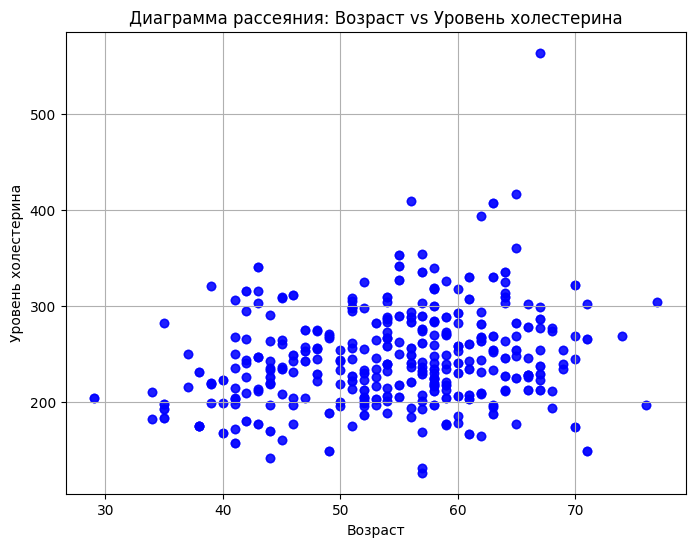

In [3]:

# Выбираем данные для оси x (возраст) и оси y (уровень холестерина)
x = data['age']
y = data['chol']

# Строим диаграмму рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, color='blue')
plt.title('Диаграмма рассеяния: Возраст vs Уровень холестерина')
plt.xlabel('Возраст')
plt.ylabel('Уровень холестерина')
plt.grid(True)
plt.show()
